In [1121]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [1122]:
with zipfile.ZipFile("crashes.csv.zip") as z1:
    with z1.open("crashes.csv") as crashes:
        df_crashes = pd.read_csv(crashes)

df_crashes.head()

CRASH_RECORD_ID     RD_NO  \
0  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...  JC199149   
1  792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...  JB422857   
2  0115ade9a755e835255508463f7e9c4a9a0b47e9304238...  JF318029   
3  017040c61958d2fa977c956b2bd2d6759ef7754496dc96...  JF324552   
4  78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...  JB291672   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  03/25/2019 02:43:00 PM                30.0   
1              NaN  09/05/2018 08:40:00 AM                30.0   
2              NaN  07/15/2022 12:45:00 AM                30.0   
3              NaN  07/15/2022 06:50:00 PM                30.0   
4              NaN  06/03/2018 05:00:00 PM                30.0   

  TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
0         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
1            NO CONTROLS           NO CONTROLS             CLEAR   
2                UNKNOWN               UNKNOWN             CLEAR   
3         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   
4            NO CONTROLS           NO CONTROLS             CLEAR   

       LIGHTING_CONDITION      FIRST_CRASH_TYPE  ...  \
0                DAYLIGHT               TURNING  ...   
1                DAYLIGHT                 ANGLE  ...   
2  DARKNESS, LIGHTED ROAD                 ANGLE  ...   
3                DAYLIGHT              REAR END  ...   
4                 UNKNOWN  PARKED MOTOR VEHICLE  ...   

  INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
0                         0.0                            1.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    2.0              0.0       14.0               2.0   
1                    2.0              0.0        8.0               4.0   
2                    2.0              0.0        0.0               6.0   
3                    2.0              0.0       18.0               6.0   
4                    1.0              0.0       17.0               1.0   

  CRASH_MONTH   LATITUDE  LONGITUDE                                  LOCATION  
0         3.0  41.884547 -87.641201   POINT (-87.64120093714 41.884547224337)  
1         9.0  41.968562 -87.740659  POINT (-87.740659314632 41.968562453871)  
2         7.0  41.886336 -87.716203  POINT (-87.716203130599 41.886336409761)  
3         7.0  41.925111 -87.667997  POINT (-87.667997321599 41.925110815832)  
4         6.0  41.910758 -87.731389  POINT (-87.731388754145 41.910757551599)  

[5 rows x 49 columns]

In [1123]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416872 entries, 0 to 416871
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                416872 non-null  object 
 1   RD_NO                          416813 non-null  object 
 2   CRASH_DATE_EST_I               31821 non-null   object 
 3   CRASH_DATE                     416868 non-null  object 
 4   POSTED_SPEED_LIMIT             416868 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         416868 non-null  object 
 6   DEVICE_CONDITION               416868 non-null  object 
 7   WEATHER_CONDITION              416868 non-null  object 
 8   LIGHTING_CONDITION             416868 non-null  object 
 9   FIRST_CRASH_TYPE               416867 non-null  object 
 10  TRAFFICWAY_TYPE                416867 non-null  object 
 11  LANE_CNT                       126015 non-null  float64
 12  ALIGNMENT                     

## Feature Engineering

#### `MOST_SEVERE_INJURY` column

In [1124]:
df_crashes["MOST_SEVERE_INJURY"].value_counts()

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     359916
NONINCAPACITATING INJURY     31551
REPORTED, NOT EVIDENT        16985
INCAPACITATING INJURY         7039
FATAL                          464
Name: count, dtype: int64

In [1125]:
df_crashes["MOST_SEVERE_INJURY"].isna().sum()

917

In [1126]:
# Dropping null values from the target variable column
df_crashes = df_crashes.loc[df_crashes["MOST_SEVERE_INJURY"].notna()]
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415955 entries, 0 to 416866
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                415955 non-null  object 
 1   RD_NO                          415900 non-null  object 
 2   CRASH_DATE_EST_I               31625 non-null   object 
 3   CRASH_DATE                     415955 non-null  object 
 4   POSTED_SPEED_LIMIT             415955 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         415955 non-null  object 
 6   DEVICE_CONDITION               415955 non-null  object 
 7   WEATHER_CONDITION              415955 non-null  object 
 8   LIGHTING_CONDITION             415955 non-null  object 
 9   FIRST_CRASH_TYPE               415955 non-null  object 
 10  TRAFFICWAY_TYPE                415955 non-null  object 
 11  LANE_CNT                       125779 non-null  float64
 12  ALIGNMENT                      4159

In [1127]:
# Filtering the dataset for only rainy weather
df_crashes = df_crashes.loc[df_crashes["WEATHER_CONDITION"] == "RAIN"]
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35894 entries, 12 to 416854
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                35894 non-null  object 
 1   RD_NO                          35887 non-null  object 
 2   CRASH_DATE_EST_I               2248 non-null   object 
 3   CRASH_DATE                     35894 non-null  object 
 4   POSTED_SPEED_LIMIT             35894 non-null  float64
 5   TRAFFIC_CONTROL_DEVICE         35894 non-null  object 
 6   DEVICE_CONDITION               35894 non-null  object 
 7   WEATHER_CONDITION              35894 non-null  object 
 8   LIGHTING_CONDITION             35894 non-null  object 
 9   FIRST_CRASH_TYPE               35894 non-null  object 
 10  TRAFFICWAY_TYPE                35894 non-null  object 
 11  LANE_CNT                       11598 non-null  float64
 12  ALIGNMENT                      35894 non-null  ob

In [1128]:
# Making most severe injury column binary
injury_binary = {'NO INDICATION OF INJURY': 0, 'NONINCAPACITATING INJURY': 1, 'REPORTED, NOT EVIDENT': 1, 'INCAPACITATING INJURY': 1, 'FATAL': 1}

df_crashes["INJURY_BINARY"] = df_crashes["MOST_SEVERE_INJURY"].map(injury_binary)
df_crashes["INJURY_BINARY"].value_counts()
# Worth noting that it is very imbalanced.

INJURY_BINARY
0    30036
1     5858
Name: count, dtype: int64

#### Selecting relevent columns for our analyses

For the first responders, we would like to evaluate the relationship between various factors in car crashes in Chicago and the injuries resulting from the car crashes. Largely, these factors include: **weather condition, time of the crashes, and severity of the damage to the car**.

In [1129]:
col_names = ['LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'MOST_SEVERE_INJURY', 'INJURY_BINARY']

df_crashes = df_crashes[col_names]
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35894 entries, 12 to 416854
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIGHTING_CONDITION  35894 non-null  object 
 1   CRASH_HOUR          35894 non-null  float64
 2   CRASH_DAY_OF_WEEK   35894 non-null  float64
 3   CRASH_MONTH         35894 non-null  float64
 4   MOST_SEVERE_INJURY  35894 non-null  object 
 5   INJURY_BINARY       35894 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB


#### Checking for missing values

In [1130]:
df_crashes.isna().sum()

LIGHTING_CONDITION    0
CRASH_HOUR            0
CRASH_DAY_OF_WEEK     0
CRASH_MONTH           0
MOST_SEVERE_INJURY    0
INJURY_BINARY         0
dtype: int64

# EDA

### Explore the UNIQUE VALUES of each column.

In [1131]:
print("\nUnique values in the 'LIGHTING_CONDITION' column:")
print(df_crashes['LIGHTING_CONDITION'].value_counts())

print("\nUnique values in the 'MOST_SEVERE_INJURY' column:")
print(df_crashes['MOST_SEVERE_INJURY'].value_counts())

print("\nUnique values in the 'CRASH_HOUR' column:")
print(df_crashes['CRASH_HOUR'].value_counts())

print("\nUnique values in the 'CRASH_DAY_OF_WEEK' column:")
print(df_crashes['CRASH_DAY_OF_WEEK'].value_counts())

print("\nUnique values in the 'CRASH_MONTH' column:")
print(df_crashes['CRASH_MONTH'].value_counts())


Unique values in the 'LIGHTING_CONDITION' column:
LIGHTING_CONDITION
DAYLIGHT                  19727
DARKNESS, LIGHTED ROAD    10780
DARKNESS                   2455
DUSK                       1556
DAWN                        999
UNKNOWN                     377
Name: count, dtype: int64

Unique values in the 'MOST_SEVERE_INJURY' column:
MOST_SEVERE_INJURY
NO INDICATION OF INJURY     30036
NONINCAPACITATING INJURY     3280
REPORTED, NOT EVIDENT        1821
INCAPACITATING INJURY         716
FATAL                          41
Name: count, dtype: int64

Unique values in the 'CRASH_HOUR' column:
CRASH_HOUR
17.0    2600
16.0    2525
15.0    2379
18.0    2245
14.0    1929
13.0    1869
8.0     1867
19.0    1858
12.0    1772
7.0     1655
9.0     1646
20.0    1610
11.0    1588
10.0    1470
21.0    1463
22.0    1332
23.0    1125
6.0      963
0.0      848
1.0      789
2.0      663
5.0      606
3.0      568
4.0      524
Name: count, dtype: int64

Unique values in the 'CRASH_DAY_OF_WEEK' column:
CRAS

### Make countplots for the UNIQUE values of each categorical column.

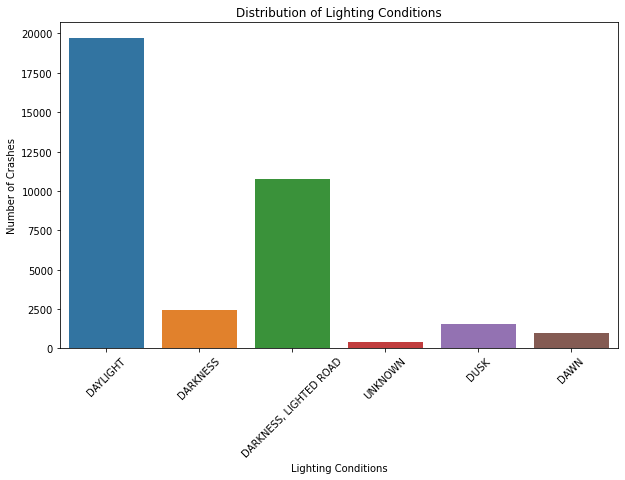

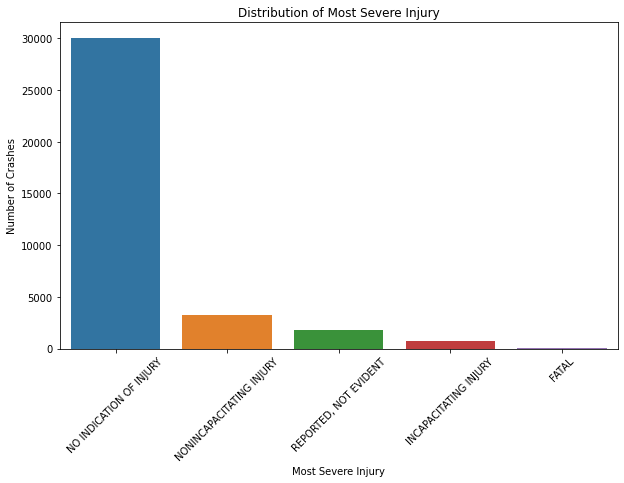

In [1132]:
# Countplot for 'LIGHTING_CONDITION' with adjusted spacing between bars
plt.figure(figsize = (10, 6))
sns.countplot(data = df_crashes, x = 'LIGHTING_CONDITION', dodge = True)
plt.title('Distribution of Lighting Conditions')
plt.xlabel('Lighting Conditions')
plt.ylabel('Number of Crashes')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.show()

# Countplot for 'MOST_SEVERE_INJURY' with adjusted spacing between bars
plt.figure(figsize = (10, 6))
sns.countplot(data = df_crashes, x = 'MOST_SEVERE_INJURY', dodge = True)
plt.title('Distribution of Most Severe Injury')
plt.xlabel('Most Severe Injury')
plt.ylabel('Number of Crashes')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
plt.show()

In [1133]:
grouped = df_crashes.groupby('MOST_SEVERE_INJURY')
count_per_group = grouped.size()
print(count_per_group.sort_values(ascending = False))

MOST_SEVERE_INJURY
NO INDICATION OF INJURY     30036
NONINCAPACITATING INJURY     3280
REPORTED, NOT EVIDENT        1821
INCAPACITATING INJURY         716
FATAL                          41
dtype: int64


### Make countplots for the UNIQUE values of each discrete numerical column.

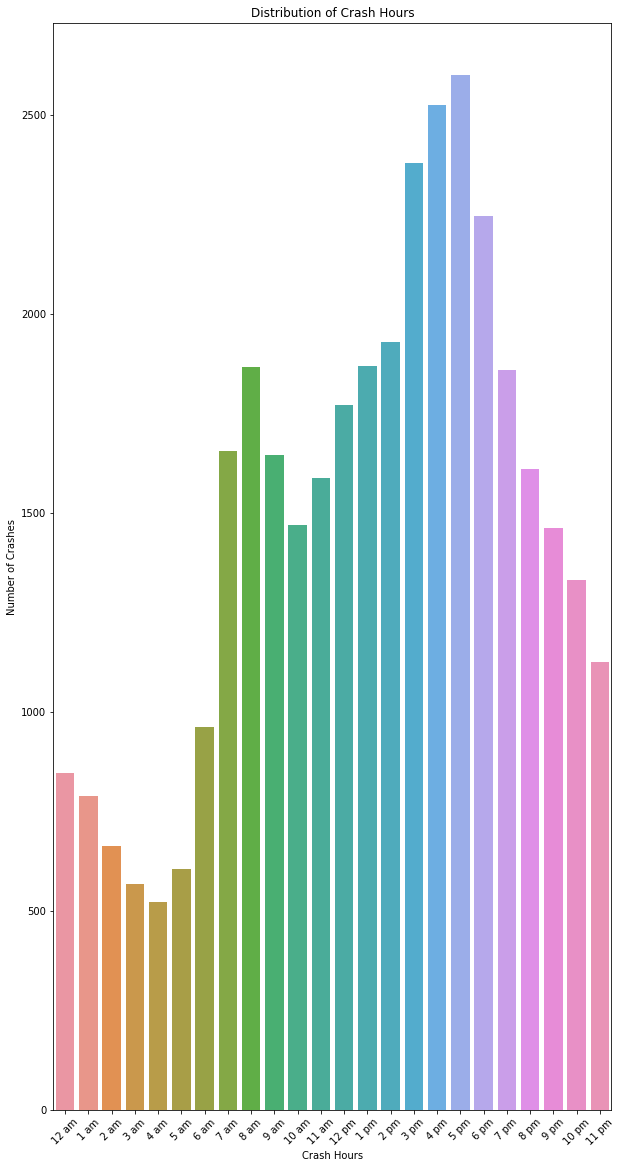

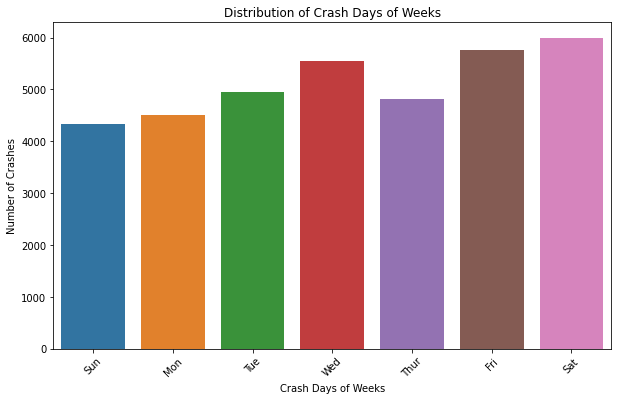

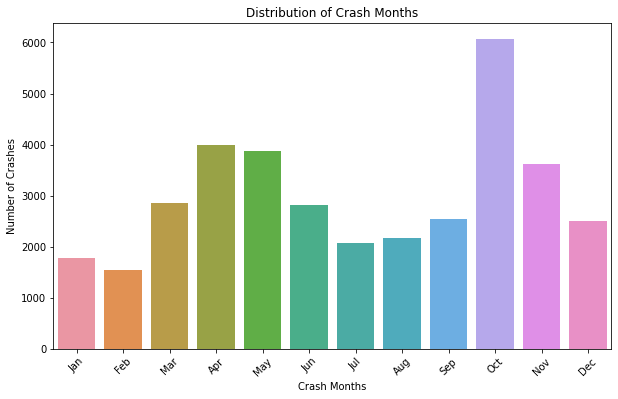

In [1134]:
# Countplot for 'CRASH_HOUR'
plt.figure(figsize = (10, 20))
sns.countplot(data = df_crashes, x = 'CRASH_HOUR', dodge = True)
plt.title('Distribution of Crash Hours')
plt.xlabel('Crash Hours')
plt.ylabel('Number of Crashes')
plt.xticks(range(24), ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am',
                       '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm',
                       '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm'], 
           rotation = 45)  # Rotate x-axis labels if needed
plt.show()

# Countplot for 'CRASH_DAY_OF_WEEK' with adjusted spacing between bars
plt.figure(figsize = (10, 6))
sns.countplot(data = df_crashes, x = 'CRASH_DAY_OF_WEEK', dodge = True)
plt.title('Distribution of Crash Days of Weeks')
plt.xlabel('Crash Days of Weeks')
plt.ylabel('Number of Crashes')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'], 
           rotation = 45)  # Rotate x-axis labels if needed
plt.show()

# Countplot for 'CRASH_MONTH' with adjusted spacing between bars
plt.figure(figsize = (10, 6))
sns.countplot(data = df_crashes, x = 'CRASH_MONTH', dodge = True)
plt.title('Distribution of Crash Months')
plt.xlabel('Crash Months')
plt.ylabel('Number of Crashes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation = 45)  # Rotate x-axis labels if needed
plt.show()

### Make heatmaps of cross-tabulation between every possible 'MOST_SEVERE_INJURY' column pair.

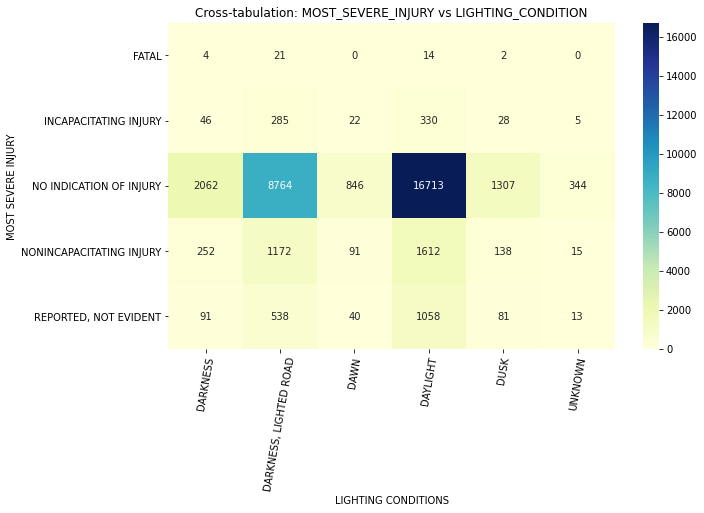

In [1135]:
# Cross-tabulation between 'MOST_SEVERE_INJURY' and 'LIGHTING_CONDITION'
cross_tab_severe_lighting = pd.crosstab(df_crashes['MOST_SEVERE_INJURY'], df_crashes['LIGHTING_CONDITION'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_severe_lighting, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Cross-tabulation: MOST_SEVERE_INJURY vs LIGHTING_CONDITION")
plt.xlabel("LIGHTING CONDITIONS")
plt.xticks(rotation = 80)  # Rotate x-axis labels if needed
plt.ylabel("MOST SEVERE INJURY")
plt.show()

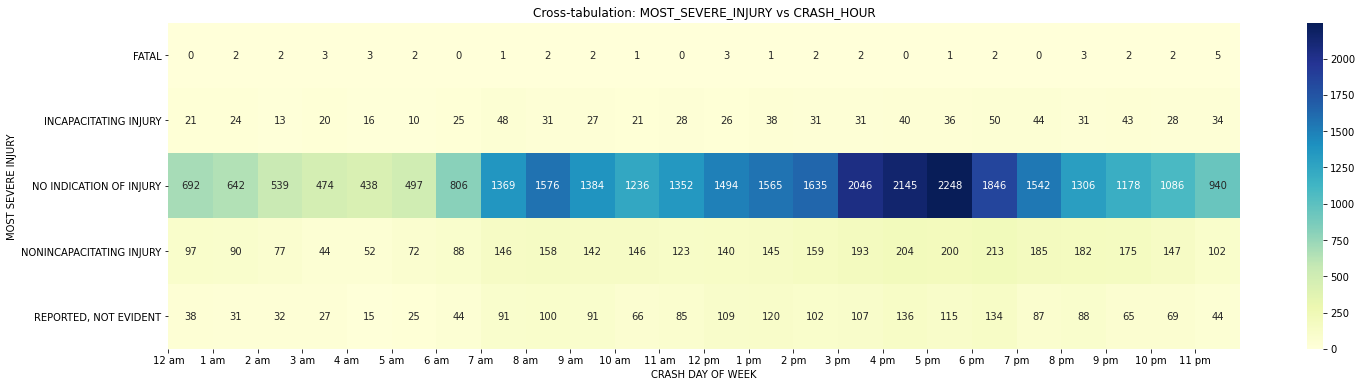

In [1136]:
# Cross-tabulation between 'MOST_SEVERE_INJURY' and 'CRASH_HOUR'
cross_tab_severe_crash_hour = pd.crosstab(df_crashes['MOST_SEVERE_INJURY'], df_crashes['CRASH_HOUR'])
plt.figure(figsize=(24, 6))
sns.heatmap(cross_tab_severe_crash_hour, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Cross-tabulation: MOST_SEVERE_INJURY vs CRASH_HOUR")
plt.xlabel("CRASH DAY OF WEEK")
plt.ylabel("MOST SEVERE INJURY")
plt.xticks(range(24), ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am',
                       '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm',
                       '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm'])
plt.show()

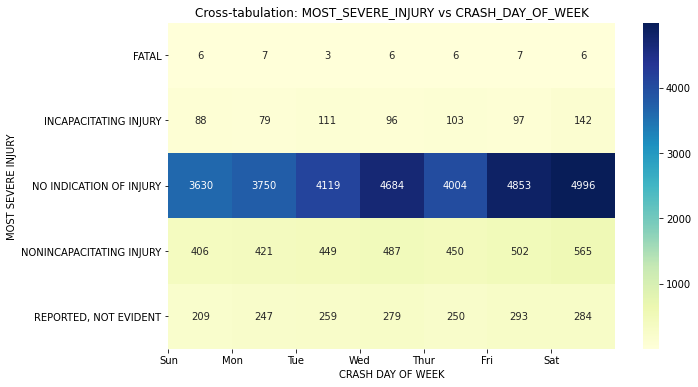

In [1137]:
# Cross-tabulation between 'MOST_SEVERE_INJURY' and 'CRASH_DAY_OF_WEEK'
cross_tab_severe_crash_day_of_week = pd.crosstab(df_crashes['MOST_SEVERE_INJURY'], df_crashes['CRASH_DAY_OF_WEEK'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_severe_crash_day_of_week, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Cross-tabulation: MOST_SEVERE_INJURY vs CRASH_DAY_OF_WEEK")
plt.xlabel("CRASH DAY OF WEEK")
plt.ylabel("MOST SEVERE INJURY")
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.show()

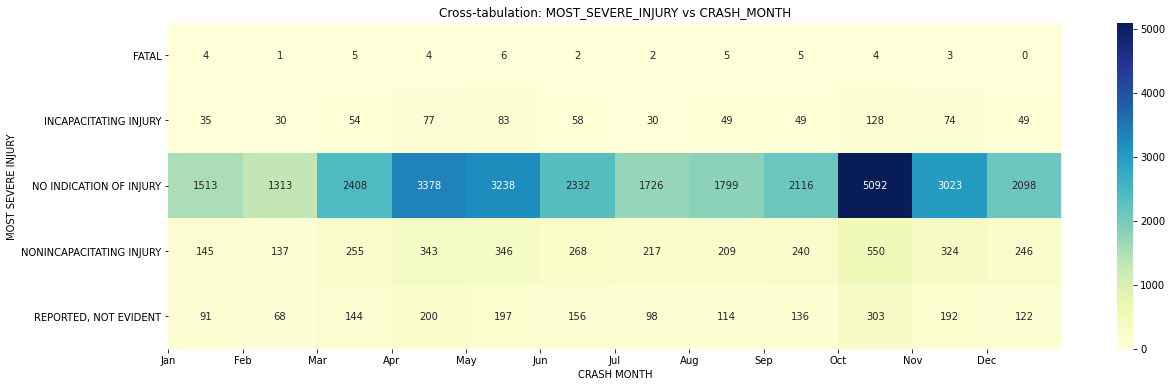

In [1138]:
# Cross-tabulation between 'MOST_SEVERE_INJURY' and 'CRASH_MONTH'
cross_tab_severe_crash_month = pd.crosstab(df_crashes['MOST_SEVERE_INJURY'], df_crashes['CRASH_MONTH'])
plt.figure(figsize=(20, 6))
sns.heatmap(cross_tab_severe_crash_month, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Cross-tabulation: MOST_SEVERE_INJURY vs CRASH_MONTH")
plt.xlabel("CRASH MONTH")
plt.ylabel("MOST SEVERE INJURY")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [1139]:
# groupby for EDA
grouped_crashes_binary = df_crashes.groupby(['INJURY_BINARY'])

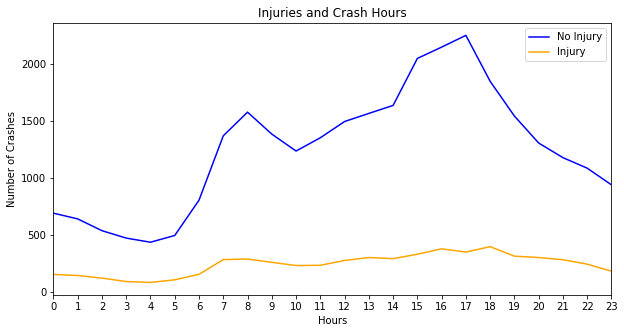

In [1140]:
# A line graph of No Injury/Injury on Crash Hours
fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_HOUR'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_HOUR'].value_counts().sort_index().values
ax.plot(x_no_injury, y_no_injury, 'b', label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_HOUR'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_HOUR'].value_counts().sort_index().values
ax.plot(x_injury, y_injury, 'orange', label='Injury')

ax.set_title("Injuries and Crash Hours")
ax.set_xlabel("Hours")
ax.set_ylabel("Number of Crashes")
ax.set_xticks(range(0,25))
plt.margins(x=0)
ax.legend()

# Potentially, this may be interesting
# It seems more injuries resulting from car crashes occur between 3-5 pm
# Rather than night time or rush hour

<ipython-input-1141-9a9bb0c145b9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])


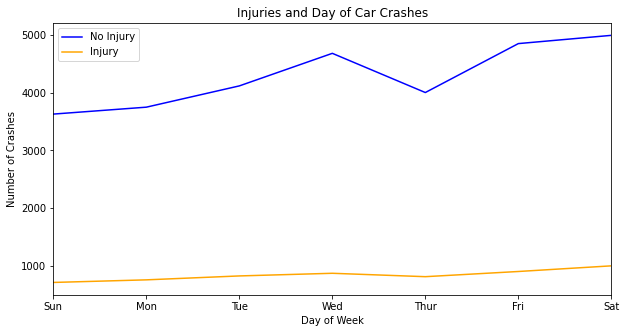

In [1141]:
# A line graph on day of week
fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().values
ax.plot(x_no_injury, y_no_injury, 'b', label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_DAY_OF_WEEK'].value_counts().sort_index().values
ax.plot(x_injury, y_injury, 'orange', label='Injury')

ax.set_title("Injuries and Day of Car Crashes")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Crashes")
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.margins(x=0)
ax.legend()

# Nothing too noticable
# Slight peak on Friday and Saturday
# Visitors and tourists visiting from outside of the city may contribute to this slight increase

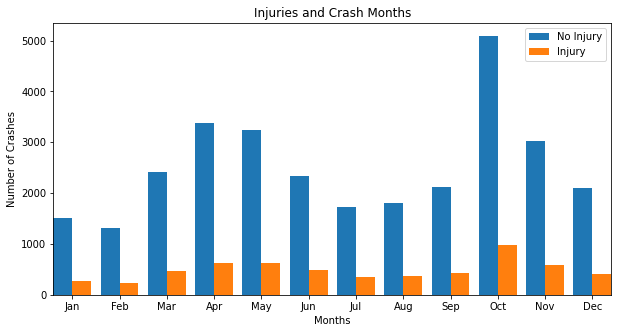

In [1142]:
# A Grouped bar graph on No Injury/Injury and Crash Months

fig, ax = plt.subplots(figsize=(10,5))
x_no_injury = grouped_crashes_binary.get_group(0)['CRASH_MONTH'].value_counts().sort_index().index
y_no_injury = grouped_crashes_binary.get_group(0)['CRASH_MONTH'].value_counts().sort_index().values
ax.bar(x_no_injury -0.2, y_no_injury, 0.4, label='No Injury')

x_injury = grouped_crashes_binary.get_group(1)['CRASH_MONTH'].value_counts().sort_index().index
y_injury = grouped_crashes_binary.get_group(1)['CRASH_MONTH'].value_counts().sort_index().values
ax.bar(x_injury + 0.2, y_injury + 0.4, 0.4, label='Injury')

ax.set_xticks(range(1,13))

ax.set_title("Injuries and Crash Months")
ax.set_xlabel("Months")
ax.set_ylabel("Number of Crashes")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.margins(x=0)
ax.legend()

# I would have guessed more crashes during the winter months
# But there seems to be no dramatic differences between months

### Attempt to run Dummy Classifier Model

Baseline model to pick the most frequent category. Good to compare with other models later on.

In [1143]:
X = df_crashes.drop(["INJURY_BINARY", "MOST_SEVERE_INJURY"], axis=1)
y = df_crashes.INJURY_BINARY
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### PERFORM ONE-HOT ENCODING FOR SUITABLE CATEGORICAL COLUMNS.

In [1144]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_train = pd.get_dummies(X_train['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_train = pd.concat([X_train, encoded_X_train], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_train.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_train.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
353804        21.0                5.0          9.0              False   
160869        14.0                1.0          1.0              False   
218978         7.0                5.0          8.0              False   
293224        19.0                6.0          9.0              False   
298067        17.0                7.0          2.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
353804                             True          False              False   
160869                            False          False               True   
218978                            False          False               True   
293224                             True          False              False   
298067                             True          False              False   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
353804          False             False  
160869        

### PERFORM SMOTE TO ADDRESS CLASS IMBALANCE.

In [1145]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [1146]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_smote, y_train_smote)
y_pred_dummy_clf = dummy_clf.predict(X_test)


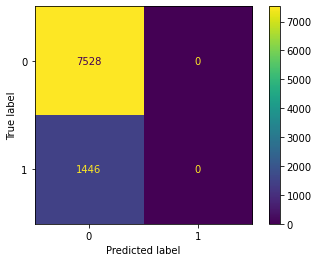

In [1147]:
cm_dummy_clf = confusion_matrix(y_test, y_pred_dummy_clf)
disp = ConfusionMatrixDisplay(cm_dummy_clf)
disp.plot()

In [1148]:
dummy_clf_accuracy = accuracy_score(y_test, y_pred_dummy_clf)
dummy_clf_accuracy

0.8388678404279029

In [1149]:
dummy_clf_recall = recall_score(y_test, y_pred_dummy_clf)
dummy_clf_recall

0.0

### Attempt to run Decision Tree Classifier

It needs numeric values for X's, and no null values.

In [1150]:
# # OneHotEncoder to make categories numeric
# # This seems necessary before doing SMOTE or DT
# ohe = OneHotEncoder(drop='first')
# X_train_encd = ohe.fit_transform(X_train).toarray()

# X_train_encoded = pd.DataFrame (X_train_encd, columns=ohe.get_feature_names_out())
# X_train_encoded.columns

In [1151]:
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)


In [1152]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(max_depth=5)

In [1153]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_test = pd.get_dummies(X_test['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_test = pd.concat([X_test, encoded_X_test], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_test.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_test.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
54399         21.0                2.0          7.0               True   
85931         14.0                1.0          3.0              False   
66444          8.0                2.0          7.0              False   
113052        10.0                5.0          4.0              False   
152711        13.0                3.0          9.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
54399                             False          False              False   
85931                             False          False               True   
66444                             False          False               True   
113052                            False          False               True   
152711                            False          False               True   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
54399           False             False  
85931         

[Text(0.7119565217391305, 0.9166666666666666, 'x[4] <= 0.5\ngini = 0.5\nsamples = 45016\nvalue = [22508, 22508]'),
 Text(0.5108695652173914, 0.75, 'x[6] <= 0.5\ngini = 0.498\nsamples = 29924\nvalue = [15890, 14034]'),
 Text(0.32608695652173914, 0.5833333333333334, 'x[8] <= 0.5\ngini = 0.478\nsamples = 5557\nvalue = [3363, 2194]'),
 Text(0.17391304347826086, 0.4166666666666667, 'x[0] <= 15.009\ngini = 0.484\nsamples = 5251\nvalue = [3097, 2154]'),
 Text(0.08695652173913043, 0.25, 'x[5] <= 0.5\ngini = 0.445\nsamples = 1631\nvalue = [1085, 546]'),
 Text(0.043478260869565216, 0.08333333333333333, 'gini = 0.407\nsamples = 888\nvalue = [636, 252]'),
 Text(0.13043478260869565, 0.08333333333333333, 'gini = 0.478\nsamples = 743\nvalue = [449, 294]'),
 Text(0.2608695652173913, 0.25, 'x[0] <= 21.996\ngini = 0.494\nsamples = 3620\nvalue = [2012, 1608]'),
 Text(0.21739130434782608, 0.08333333333333333, 'gini = 0.498\nsamples = 3272\nvalue = [1744, 1528]'),
 Text(0.30434782608695654, 0.0833333333333

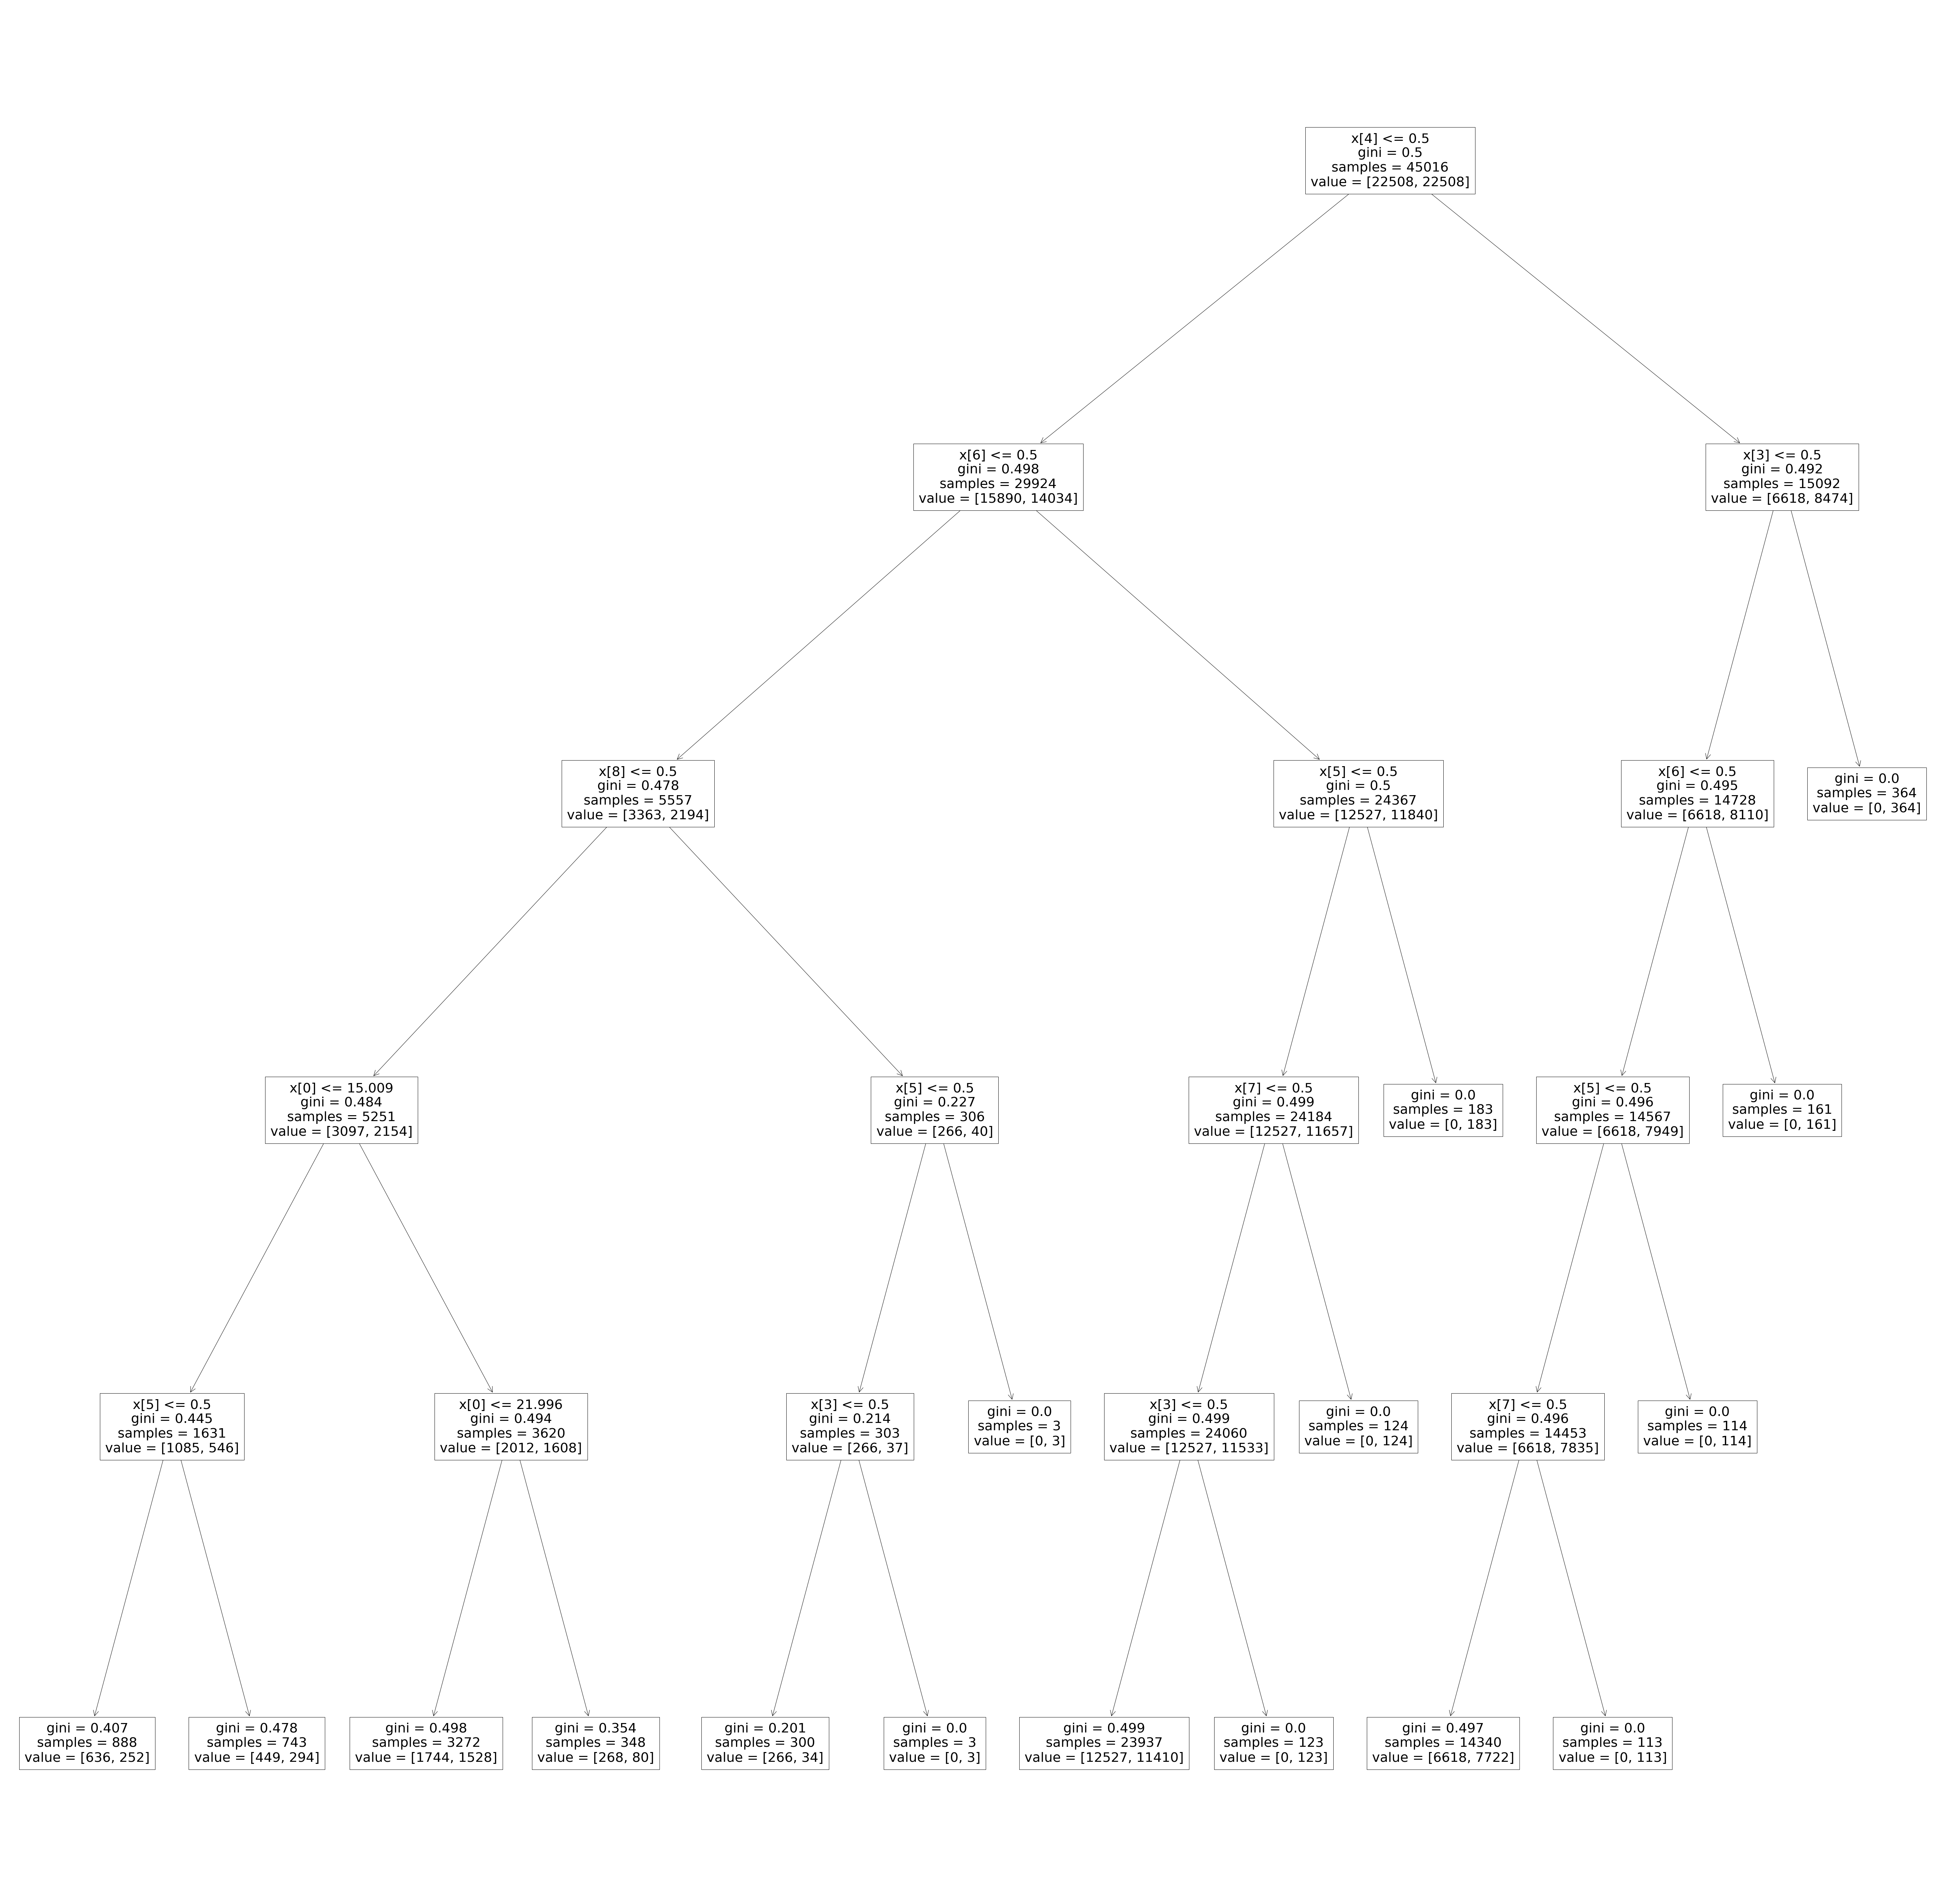

In [1154]:
y_pred = dt.predict(X_test)

f, ax = plt.subplots(figsize=(100,100))
plot_tree(dt, ax=ax)

In [1155]:
# This is the very first feature, which is the most influencial for our model
X_test.columns[4]

'LIGHTING_DARKNESS, LIGHTED ROAD'

In [1156]:
feature_imp = {}
for fi, feature in zip(dt.feature_importances_, dt.feature_names_in_):
    feature_imp[feature] = fi

feature_imp

# This confirms the most important feature is what was shown above

{'CRASH_HOUR': 0.06850794842159093,
 'CRASH_DAY_OF_WEEK': 0.0,
 'CRASH_MONTH': 0.0,
 'LIGHTING_DARKNESS': 0.23658922794270837,
 'LIGHTING_DARKNESS, LIGHTED ROAD': 0.18879265310217316,
 'LIGHTING_DAWN': 0.17551255404732657,
 'LIGHTING_DAYLIGHT': 0.1548540554195451,
 'LIGHTING_DUSK': 0.12606831802379936,
 'LIGHTING_UNKNOWN': 0.049675243042856594}

In [1157]:
y_pred_dt = dt.predict(X_test)
y_train_pred_dt = dt.predict(X_train_smote)

dt_train_accuracy = accuracy_score(y_train_smote, y_train_pred_dt)
dt_train_accuracy


0.5509152301403946

In [1158]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.654000445732115

In [1159]:
dt_train_recall = recall_score(y_train_smote, y_train_pred_dt)
dt_train_recall

0.3958592500444286

In [1160]:
dt_recall = recall_score(y_test, y_pred_dt)
dt_recall

0.3367911479944675

#### Attempt to run Decision Tree again, with multiclass target variable

In [1161]:
y2 = df_crashes.MOST_SEVERE_INJURY

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, random_state=42)

In [1162]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_train_2 = pd.get_dummies(X_train_2['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_train_2 = pd.concat([X_train_2, encoded_X_train_2], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_train_2.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_train_2.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
353804        21.0                5.0          9.0              False   
160869        14.0                1.0          1.0              False   
218978         7.0                5.0          8.0              False   
293224        19.0                6.0          9.0              False   
298067        17.0                7.0          2.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
353804                             True          False              False   
160869                            False          False               True   
218978                            False          False               True   
293224                             True          False              False   
298067                             True          False              False   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
353804          False             False  
160869        

In [1163]:
smote_2 = SMOTE()
X_resampled_2, y_resampled_2 = smote_2.fit_resample(X_train_2, y_train_2)

In [1164]:
dt_2 = DecisionTreeClassifier(max_depth=10)
dt_2.fit(X_resampled_2, y_resampled_2)

DecisionTreeClassifier(max_depth=10)

In [1165]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_test_2 = pd.get_dummies(X_test_2['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_test_2 = pd.concat([X_test_2, encoded_X_test_2], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_test_2.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_test_2.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
54399         21.0                2.0          7.0               True   
85931         14.0                1.0          3.0              False   
66444          8.0                2.0          7.0              False   
113052        10.0                5.0          4.0              False   
152711        13.0                3.0          9.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
54399                             False          False              False   
85931                             False          False               True   
66444                             False          False               True   
113052                            False          False               True   
152711                            False          False               True   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
54399           False             False  
85931         

In [1166]:
y_pred_2 = dt.predict(X_test_2)

f, ax = plt.subplots(figsize=(150,150))
plot_tree(dt_2, ax=ax)

[Text(0.5176069889162561, 0.9545454545454546, 'x[4] <= 0.5\ngini = 0.8\nsamples = 112540\nvalue = [22508, 22508, 22508, 22508, 22508]'),
 Text(0.25408713054187193, 0.8636363636363636, 'x[6] <= 0.5\ngini = 0.79\nsamples = 64255\nvalue = [7745, 12053, 15890, 13587, 14980]'),
 Text(0.11651785714285715, 0.7727272727272727, 'x[0] <= 15.002\ngini = 0.724\nsamples = 8095\nvalue = [588, 883, 3363, 2041, 1220]'),
 Text(0.06012931034482759, 0.6818181818181818, 'x[8] <= 0.5\ngini = 0.567\nsamples = 2052\nvalue = [45, 74, 1254, 415, 264]'),
 Text(0.035529556650246305, 0.5909090909090909, 'x[0] <= 4.048\ngini = 0.584\nsamples = 1842\nvalue = [45, 53, 1085, 406, 253]'),
 Text(0.019827586206896553, 0.5, 'x[2] <= 4.994\ngini = 0.437\nsamples = 468\nvalue = [1, 3, 340, 60, 64]'),
 Text(0.012807881773399015, 0.4090909090909091, 'x[2] <= 4.009\ngini = 0.611\nsamples = 158\nvalue = [0, 2, 84, 31, 41]'),
 Text(0.007881773399014778, 0.3181818181818182, 'x[2] <= 3.127\ngini = 0.534\nsamples = 134\nvalue = [0

In [1167]:
feature_imp_2 = {}
for fi, feature in zip(dt_2.feature_importances_, dt_2.feature_names_in_):
    # feature_imp[feature] = fi
    print(fi, feature)


0.2308134460681578 CRASH_HOUR
0.25643852399558703 CRASH_DAY_OF_WEEK
0.2890923008955772 CRASH_MONTH
0.05302014793353612 LIGHTING_DARKNESS
0.0586791310616611 LIGHTING_DARKNESS, LIGHTED ROAD
0.01591669809962576 LIGHTING_DAWN
0.04957440573767292 LIGHTING_DAYLIGHT
0.04357181117986362 LIGHTING_DUSK
0.0028935350283185828 LIGHTING_UNKNOWN


In [1168]:
y_pred_dt_2 = dt_2.predict(X_test_2)
y_train_pred_dt_2 = dt_2.predict(X_train_2)

dt_train_accuracy_2 = accuracy_score(y_train_2, y_train_pred_dt_2)
dt_train_accuracy_2


0.38231797919762256

In [1169]:
dt_accuracy_2 = accuracy_score(y_test_2, y_pred_dt_2)
dt_accuracy_2

0.36126587920659686

In [1170]:
dt_train_recall_2 = recall_score(y_train_2, y_train_pred_dt_2, average='micro')
dt_train_recall_2

0.38231797919762256

In [1171]:
dt_recall_2 = recall_score(y_test_2, y_pred_dt_2, average='micro')
dt_recall_2

0.36126587920659686

#### Trying out Logistic Regression Model with Multiclass Target Variable

Here, the `MOST_SEVERE_INJURY` column is used instead of `INJURY_BINARY` to make the model multiclass classification. 

In [1172]:
y3 = df_crashes.MOST_SEVERE_INJURY

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y3, random_state=42)

In [1173]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_train_3 = pd.get_dummies(X_train_3['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_train_3 = pd.concat([X_train_3, encoded_X_train_3], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_train_3.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_train_3.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
353804        21.0                5.0          9.0              False   
160869        14.0                1.0          1.0              False   
218978         7.0                5.0          8.0              False   
293224        19.0                6.0          9.0              False   
298067        17.0                7.0          2.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
353804                             True          False              False   
160869                            False          False               True   
218978                            False          False               True   
293224                             True          False              False   
298067                             True          False              False   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
353804          False             False  
160869        

In [1174]:
# Perform one-hot encoding on the 'LIGHTING_CONDITION' column
encoded_X_test_3 = pd.get_dummies(X_test_3['LIGHTING_CONDITION'], prefix='LIGHTING') # <--

# Concatenate the encoded columns to the original DataFrame
X_test_3 = pd.concat([X_test_3, encoded_X_test_3], axis=1)

# Remove the original 'LIGHTING_CONDITION' column
X_test_3.drop('LIGHTING_CONDITION', axis=1, inplace=True)

# Print the updated DataFrame
print(X_test_3.head())

        CRASH_HOUR  CRASH_DAY_OF_WEEK  CRASH_MONTH  LIGHTING_DARKNESS  \
54399         21.0                2.0          7.0               True   
85931         14.0                1.0          3.0              False   
66444          8.0                2.0          7.0              False   
113052        10.0                5.0          4.0              False   
152711        13.0                3.0          9.0              False   

        LIGHTING_DARKNESS, LIGHTED ROAD  LIGHTING_DAWN  LIGHTING_DAYLIGHT  \
54399                             False          False              False   
85931                             False          False               True   
66444                             False          False               True   
113052                            False          False               True   
152711                            False          False               True   

        LIGHTING_DUSK  LIGHTING_UNKNOWN  
54399           False             False  
85931         

In [1175]:
smote3 = SMOTE()
X_resampled_3, y_resampled_3 = smote3.fit_resample(X_train_3, y_train_3)

In [1176]:
# Create an instance of the LogisticRegression
logregmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Train the model on the oversampled training data
logregmodel.fit(X_resampled_3, y_resampled_3)

# Make predictions on the testing data
y_pred = logregmodel.predict(X_test_3)

# Evaluate the model's performance using classification metrics
accuracy = accuracy_score(y_test_3, y_pred)
precision = precision_score(y_test_3, y_pred, average = 'weighted') # Set the 'average' parameter equal to 'weighted' bc the default is 'binary'.
recall = recall_score(y_test_3, y_pred, average = 'weighted') # Set the 'average' parameter equal to 'weighted' bc the default is 'binary'.
f1 = f1_score(y_test_3, y_pred, average = 'weighted') # Set the 'average' parameter equal to 'weighted' bc the default is 'binary'.

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

/Users/llakes/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.2773568085580566
Precision: 0.72012826336146
Recall: 0.2773568085580566
F1-Score: 0.3752958032906325


In [1177]:
# logreg = LogisticRegression(random_state=42)
# logreg.fit(X_resampled_scaled_3, y_resampled_3)


In [1178]:
logregmodel.score(X_resampled_3, y_resampled_3)
# This is accuracy

0.3088146436822463

In [1179]:
logregmodel.score(X_test_3, y_test_3)
# Better accuracy than our train set

0.2773568085580566

In [1180]:
log_loss(y_resampled_3, logregmodel.predict_proba(X_resampled_3))

1.5005992423339085

In [1182]:
log_loss(y_test_3, logregmodel.predict_proba(X_test_3))
# Slightly better than train set

1.4568231609957845

In [1187]:
coef = logregmodel.coef_